# **Week-1**  <u>**Natural Language Processing**</u>

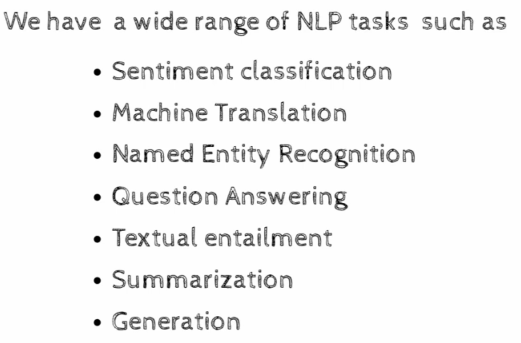

## **HuggingFace**
[Documentation](https://huggingface.co/docs/huggingface_hub/quick-start)

### **DATASETS**

In [ ]:
# !pip install datasets

In [38]:
# IMPORTS
from datasets import load_dataset, load_from_disk, get_dataset_config_names, get_dataset_split_names, concatenate_datasets, interleave_datasets
from pprint import pprint

In [ ]:
imdb = load_dataset("stanfordnlp/imdb")

In [ ]:
print(imdb)

In [ ]:
# get only train data from imdb

train_df = imdb['train']
print(train_df)

In [ ]:
# remove unsupervised data

_ = imdb.pop('unsupervised')
print(imdb)

In [ ]:
# downloading only train data from hub

train_imdb = load_dataset("stanfordnlp/imdb", split='train')
print(train_imdb)

In [ ]:
# split it into train and test

ds = train_imdb.train_test_split(test_size=0.2)
print(ds)

### **LOADING LOCAL DATASETS**

In [ ]:
data_files=[] # need to add path to csv files

local_dataset = load_dataset("csv", data_files=data_files)
print(local_dataset)

In [ ]:
train_test = local_dataset["train"].train_test_split(test_size=0.2)

In [ ]:
# storing it efficiently in pyarrow format (.arrow)

train_test.save_to_disk('pyarrow_dataset/movie_reviews')

In [ ]:
# loading dataset from disk

ds_from_disk = load_from_disk('pyarrow_dataset/movie_reviews')
print(ds_from_disk)

### **ACCESSING SAMPLES**

In [ ]:
idx = 1000
example = imdb['train'][idx]
pprint(example)

In [ ]:
idx = range(0,100,2)

example2 = imdb["train"].select(idx)
pprint(example2)

### **TRANSLATION DATASET**

In [ ]:
print(get_dataset_config_names("wmt/wmt14"))
print(get_dataset_split_names("wmt/wmt14", "hi-en"))

In [ ]:
trans_ds = load_dataset(path="wmt/wmt14", name="hi-en")
trans_ds

In [ ]:
merged_ds = load_dataset(path="wmt/wmt14", name="hi-en", split="train+test+validation")
print(merged_ds)

### **FEATURES**

- Features define the internal structure of a dataset.
- It is used to specify the underlying serialization format
- The features of a dataset vary based on the type of dataset(i.e., task, domain)

In [ ]:
pprint(trans_ds['train'].features)

### **MICROSOFT RESEARCH PARAPHRASE CORPUS (MRPC)**

In [ ]:
mrpc_dataset = load_dataset("glue", "mrpc", split='train') # load mrpc from glue benchmark
print(mrpc_dataset)

In [ ]:
pprint(mrpc_dataset.features)

### **COMMON METHODS**
- .filter
- .map
- .concatenate

In [25]:
import multiprocessing

In [ ]:
print(multiprocessing.cpu_count())

In [ ]:
# FILTERING
# suppose we want to ensure that the number of words in a sentence should be of at least 100

print("Before Filtering")
print(20*"-")
print(imdb)

In [ ]:
print("After Filtering")
print(20*"-")

num_words = 100
imdb_filtered = imdb.filter(lambda x:len(x['text'].split(' '))>=num_words)
print(imdb_filtered)

In [ ]:
# MAPPING

def add_prefix(x):
    x['text'] = "IMDB:"+ x['text']
    return x

imdb_mapped = imdb.map(add_prefix)
print(imdb_mapped)

In [ ]:
pprint(imdb_mapped['train']['text'][5])

In [ ]:
# CONCATENATING
# often we need to combine two or more datasets to create a larger dataset
# this is a typical approach for building pretraining datasets
# the only requiremt is that the datasets must have the same features and same number of splits

imdb_whole = load_dataset("stanfordnlp/imdb", split='train+test')
print(imdb_whole)

In [ ]:
print(imdb_whole.features)

In [ ]:
rt_whole = load_dataset("cornell-movie-review-data/rotten_tomatoes", split='all')
print(rt_whole)

In [ ]:
print(rt_whole.features)

In [ ]:
# concatenating the two datasets

concat_ds = concatenate_datasets([imdb_whole, rt_whole], axis=0)
print(concat_ds)

### **INTERLEAVING DATASETS**

In [ ]:
inter_ds = interleave_datasets([imdb_whole, rt_whole], probabilities=[0.6, 0.4])
print(inter_ds)

### **ITERABLE DATASET**
- suitable for loading samples from large datasets iteratively without writing anything to local disk

In [ ]:
imdb_ds = load_dataset("stanfordnlp/imdb", split='train', streaming=True)
print(imdb_ds)

In [ ]:
for x in imdb_ds:
    print(x)
    break

In [ ]:
for x in imdb_ds.map(add_prefix):
    pprint(x)
    break